# CREDIT CARD CUSTOMER SEGMENTATION CLUSTERING ANALYSIS

<font size="4">IMPORT DATA WRANGLING LIBRARIES</font>


In [1]:
## Import data wrangling libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import random as rnd
from numpy.linalg import eig


<font size="4"> VISUALIZATION LIBRARIES 

</font>

<font size="3">
    
I have included several visualizations using the Bokeh interactive library. To view these charts and interact with them, it is necessary to run the Jupyter Notebook. However, I have also included static visualizations using libraries such as Seaborn and Matplotlib, which are readily visible without running any code. These visualizations provide a comprehensive overview of the data, allowing for a deeper understanding of the patterns, relationships, and insights derived from the analysis.
</font>

In [2]:
## Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

## Import interactive Bokeh libraries
from bokeh.io import push_notebook, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import show
import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import DataTable, TableColumn
pandas_bokeh.output_notebook()
from bokeh.plotting import output_file, show


Loading BokehJS ...

<font size="4">IMPORT MACHINE LEARINING MODELS</font>

In [3]:
## import machine learning models
from sklearn.svm import SVC, LinearSVC
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

<font size="4">IMPORT PREPROCESSING AND EVALUATION LIBRARIES</font>

In [5]:
# Import evaluation libraries

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from pandas import read_csv
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


<font size="4">LOADING DATA</font>

In [6]:
## Lodining data into pandas dataframe

ccd = pd.read_csv('CC GENERAL.csv')
ccd =ccd.iloc[:,0:len(ccd)] # data retrieval

pd.set_option('display.max_columns', 20) # display 12 columns
pd.set_option('display.max_rows', 10) # display 10 rows
pd.set_option('display.width', 1000) # display 1000 charactors

# EXPLORATORY ANALYSIS

In [7]:
ccd.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<font size="3">The credit card dataset contain 18 columns with 8950 rows as shown above. There are 14 float64, 3 int64 and an object data type exists.  </font>

In [8]:
duplicates = ccd[ccd.duplicated('CUST_ID')]
duplicates


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [9]:
skewness = ccd.skew()  # Checking the skew of the data

skew_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})
print(skew_df.head(18).to_string(index=False))

                         Feature  Skewness
                         BALANCE  2.393386
               BALANCE_FREQUENCY -2.023266
                       PURCHASES  8.144269
                ONEOFF_PURCHASES 10.045083
          INSTALLMENTS_PURCHASES  7.299120
                    CASH_ADVANCE  5.166609
             PURCHASES_FREQUENCY  0.060164
      ONEOFF_PURCHASES_FREQUENCY  1.535613
PURCHASES_INSTALLMENTS_FREQUENCY  0.509201
          CASH_ADVANCE_FREQUENCY  1.828686
                CASH_ADVANCE_TRX  5.721298
                   PURCHASES_TRX  4.630655
                    CREDIT_LIMIT  1.522464
                        PAYMENTS  5.907620
                MINIMUM_PAYMENTS 13.622797
                PRC_FULL_PAYMENT  1.942820
                          TENURE -2.943017


In [10]:
ccd.head() # data top 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
ccd.tail() # data bottom 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [12]:
print('Shape of the train dataset:', ccd.shape) ## get the shape of the train data

Shape of the train dataset: (8950, 18)


In [13]:
print('Columns of dataset:',ccd.columns.values) # get column values of train data

Columns of dataset: ['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


<font size="4">INSPECTION OF MISSING DATA</font>

In [14]:
# Checking of missing data info in train dataset

total_missing1 = ccd.isnull().sum().sort_values(ascending=False) # sum of total missing values 
sub_1 = ccd.isnull().sum()/ccd.isnull().count()*100 # calculate the percetage of missing value
sub_2 = (round(sub_1, 2)).sort_values(ascending=False) # round to 2 decimal and sort values

missing_data = pd.concat([total_missing1, sub_2], axis=1, keys=['Total', '%'])# joined total missing and percentage in dataframe
missing_data.head(18)

,Total,%
MINIMUM_PAYMENTS,313,3.50
CREDIT_LIMIT,1,0.01
CUST_ID,0,0.00
BALANCE,0,0.00
PRC_FULL_PAYMENT,0,0.00
...,...,...
INSTALLMENTS_PURCHASES,0,0.00
ONEOFF_PURCHASES,0,0.00
PURCHASES,0,0.00
BALANCE_FREQUENCY,0,0.00


Missing data found in this dataset.

<font size="4">DESCRIPTIVE STATISTICAL ANALYSIS</font>

In [15]:
ccd.describe()# Descriptive statistical analysis 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<font size="4">CORRELATION ANALYSIS</font>

In [16]:
cormat = ccd.corr().round(2)  # Correlation matrix of the dataset
cormat

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00,0.32,0.18,0.16,0.13,0.50,-0.08,0.07,-0.06,0.45,0.39,0.15,0.53,0.32,0.40,-0.32,0.07
BALANCE_FREQUENCY,0.32,1.00,0.13,0.10,0.12,0.10,0.23,0.20,0.18,0.19,0.14,0.19,0.10,0.07,0.13,-0.10,0.12
PURCHASES,0.18,0.13,1.00,0.92,0.68,-0.05,0.39,0.50,0.32,-0.12,-0.07,0.69,0.36,0.60,0.09,0.18,0.09
ONEOFF_PURCHASES,0.16,0.10,0.92,1.00,0.33,-0.03,0.26,0.52,0.13,-0.08,-0.05,0.55,0.32,0.57,0.05,0.13,0.06
INSTALLMENTS_PURCHASES,0.13,0.12,0.68,0.33,1.00,-0.06,0.44,0.21,0.51,-0.13,-0.07,0.63,0.26,0.38,0.13,0.18,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CREDIT_LIMIT,0.53,0.10,0.36,0.32,0.26,0.30,0.12,0.30,0.06,0.13,0.15,0.27,1.00,0.42,0.13,0.06,0.14
PAYMENTS,0.32,0.07,0.60,0.57,0.38,0.45,0.10,0.24,0.09,0.18,0.26,0.37,0.42,1.00,0.13,0.11,0.11
MINIMUM_PAYMENTS,0.40,0.13,0.09,0.05,0.13,0.14,0.00,-0.03,0.03,0.10,0.11,0.10,0.13,0.13,1.00,-0.14,0.06
PRC_FULL_PAYMENT,-0.32,-0.10,0.18,0.13,0.18,-0.15,0.31,0.16,0.25,-0.25,-0.17,0.16,0.06,0.11,-0.14,1.00,-0.02


# DATA VISUALIZATION

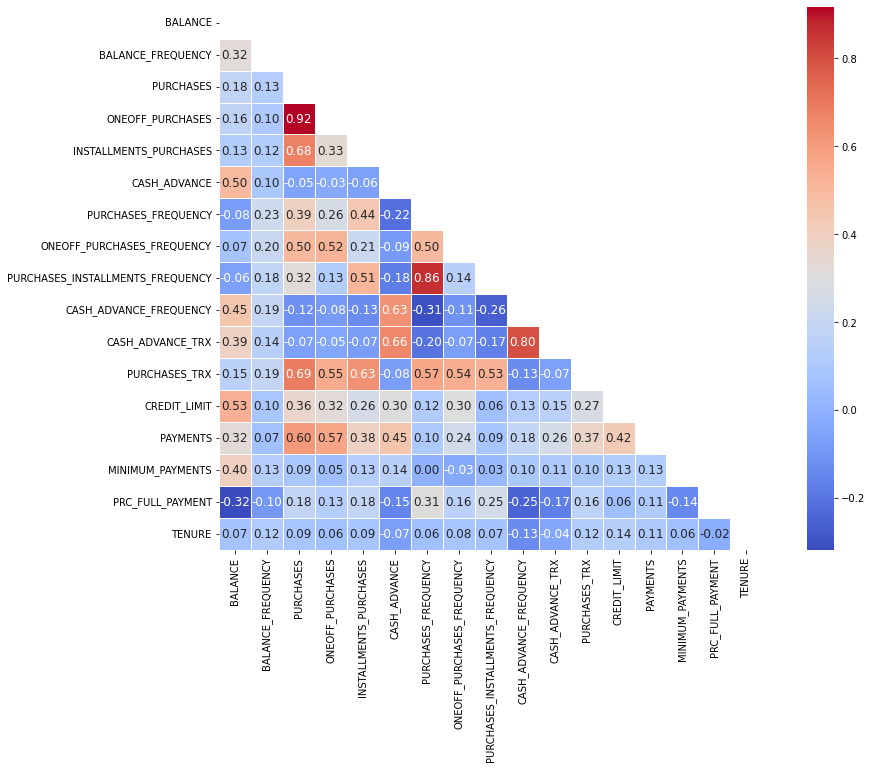

In [17]:
# Creating a heatmap of feature correlation
plt.figure(figsize=(16, 10))
hide = np.triu(ccd.corr())
sns.heatmap(ccd.corr(), cmap="coolwarm", annot=True,
            fmt='.2f', annot_kws={'size':12},
            linewidths=0.5, square=True,
            mask= hide)
plt.show()

A strong positive correlation was found between one-off purchases and total purchases, as well as between installment purchase frequency and overall purchase frequency. Additionally, a strong positive correlation was observed between cash advance transactions and purchase frequency.

Moderate positive correlations were identified between total purchases and both installment purchases and purchase transactions. Similarly, moderate positive correlations were noted between cash advances and both cash advance frequency and cash advance transactions.



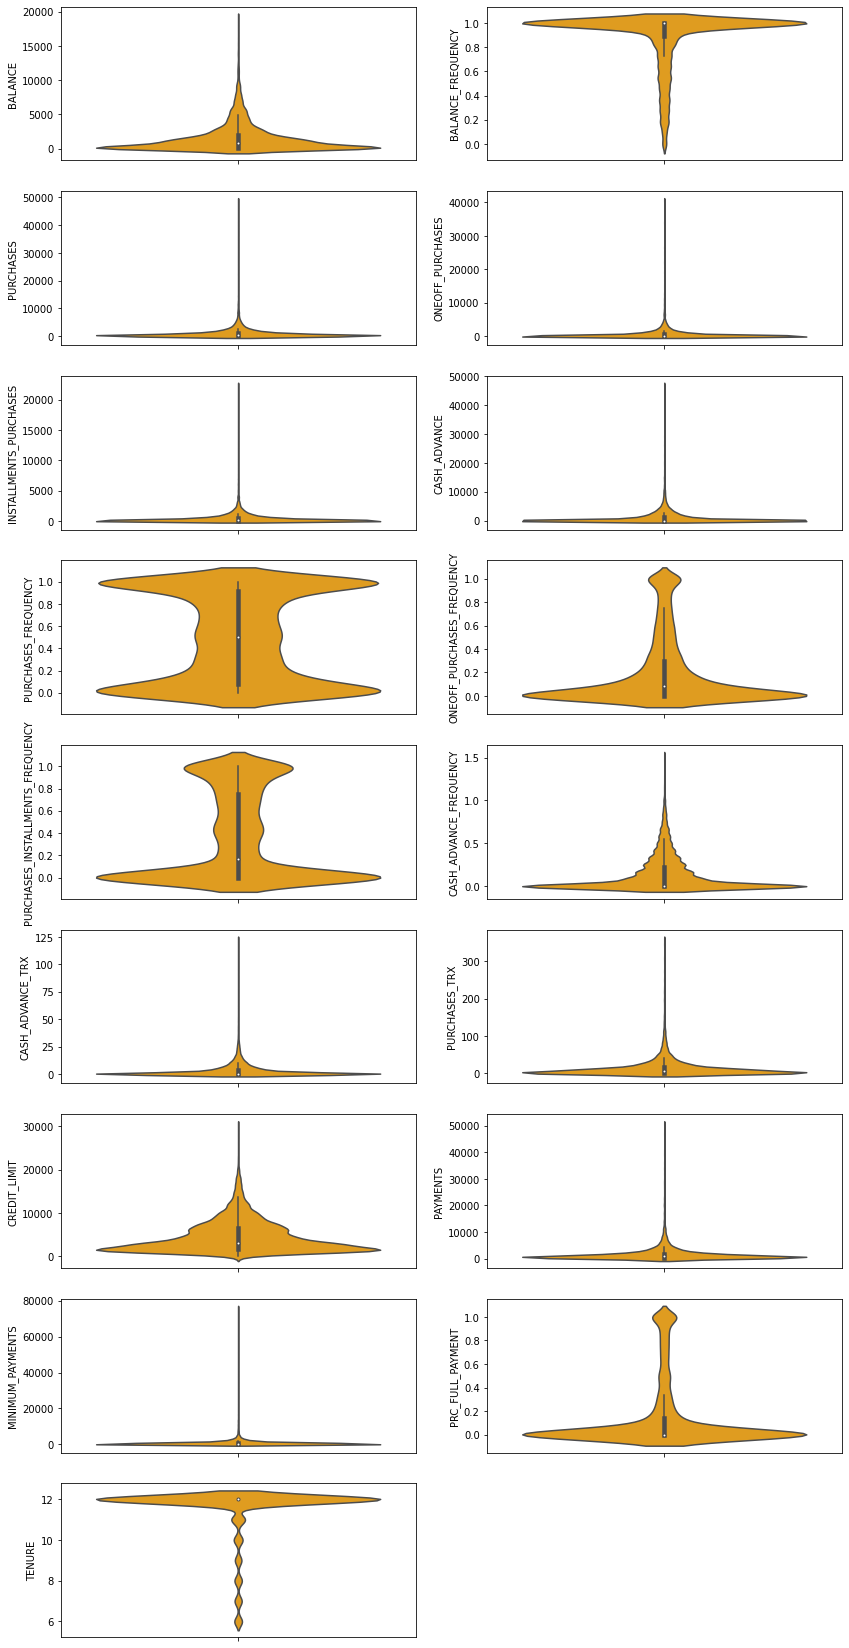

In [18]:
# Violin distribution
plt.figure(figsize=(14, 30))

def violin(r, c, n, y):
    plt.subplot(r, c, n)
    sns.violinplot(y=y, data=ccd,color = 'orange')

variables = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

for i, variable in enumerate(variables, start=1):
    violin(9, 2, i, variable)

plt.show()

The data distribution appeared to be extremely skewed for many variables, as shown in the earlier skew table.

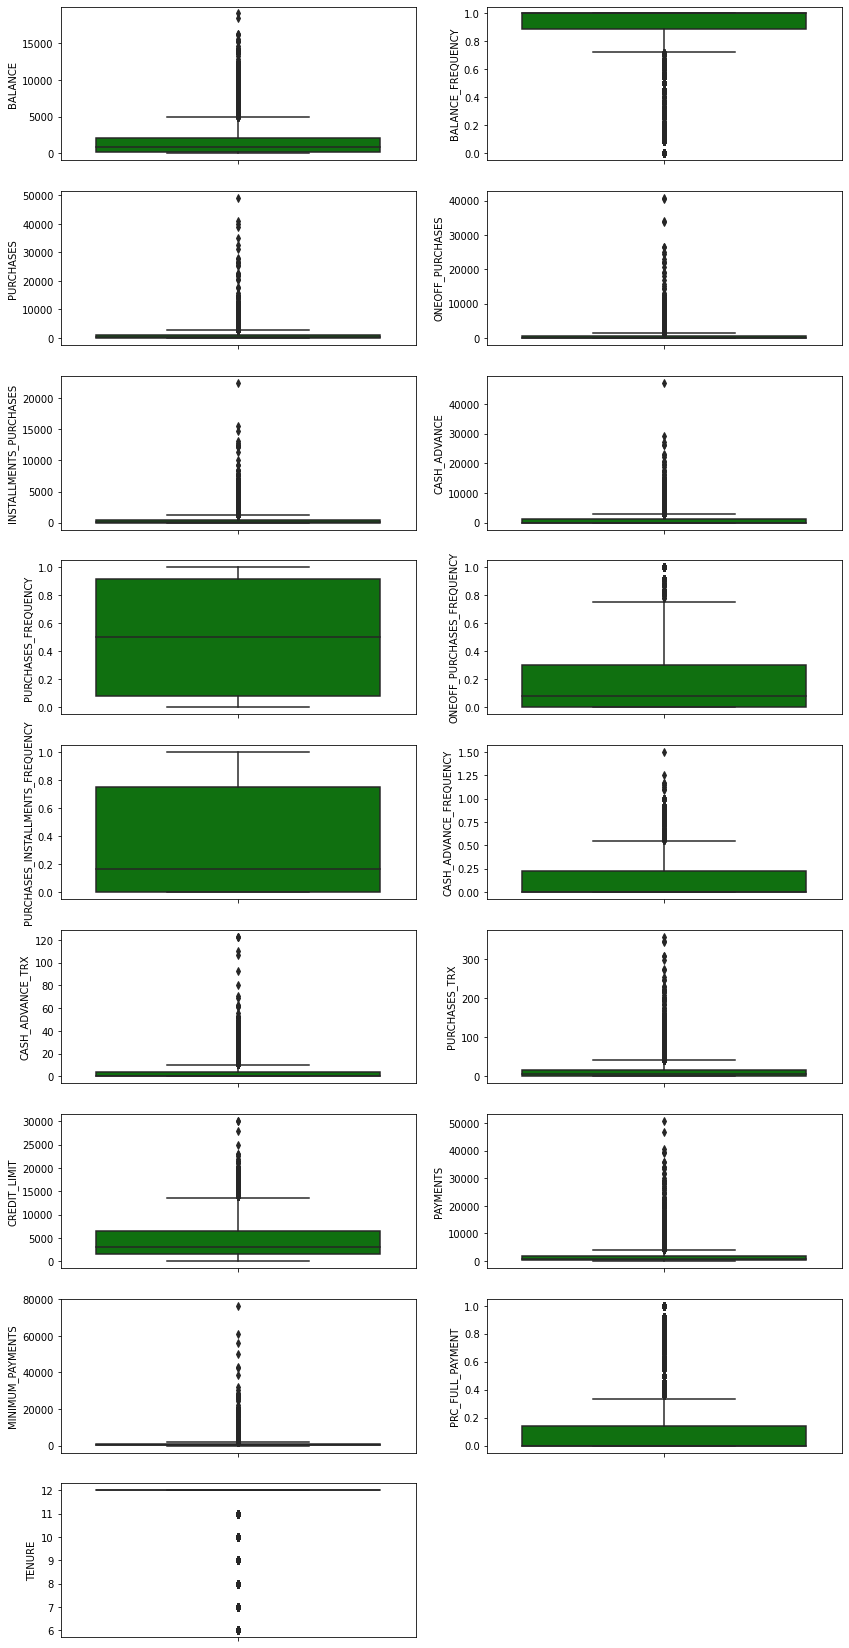

In [19]:
plt.figure(figsize=(14, 30))

def box(r, c, n, y):
    plt.subplot(r, c, n)
    sns.boxplot(y=y, data=ccd, color = 'green')

variables = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

for i, variable in enumerate(variables, start=1):
    box(9, 2, i, variable)

plt.show()

The box plots above offer another perspective on the data distribution and reveal the presence of outliers.

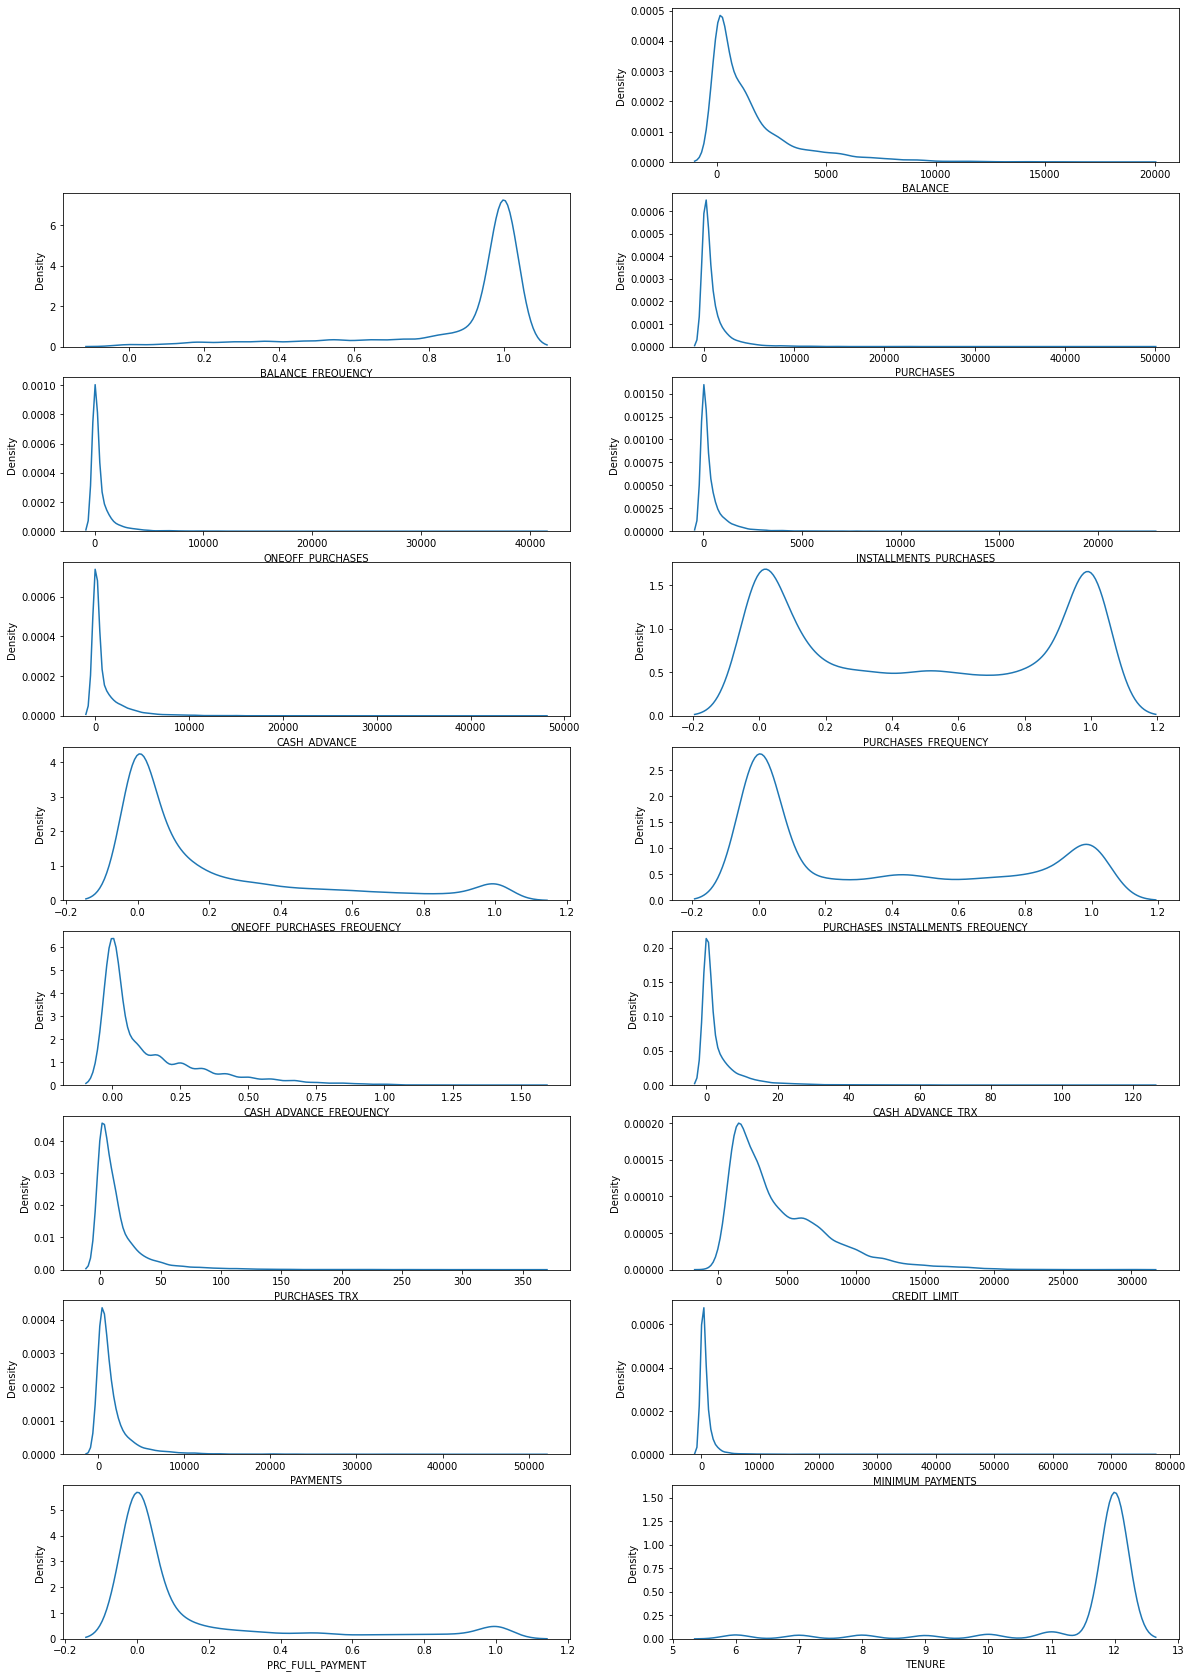

In [20]:
plt.figure(figsize=(20,30))
for i, col in enumerate(ccd.columns):
    if ccd[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(ccd[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

The KDE chart also demonstrates how the distributions vary at different data points

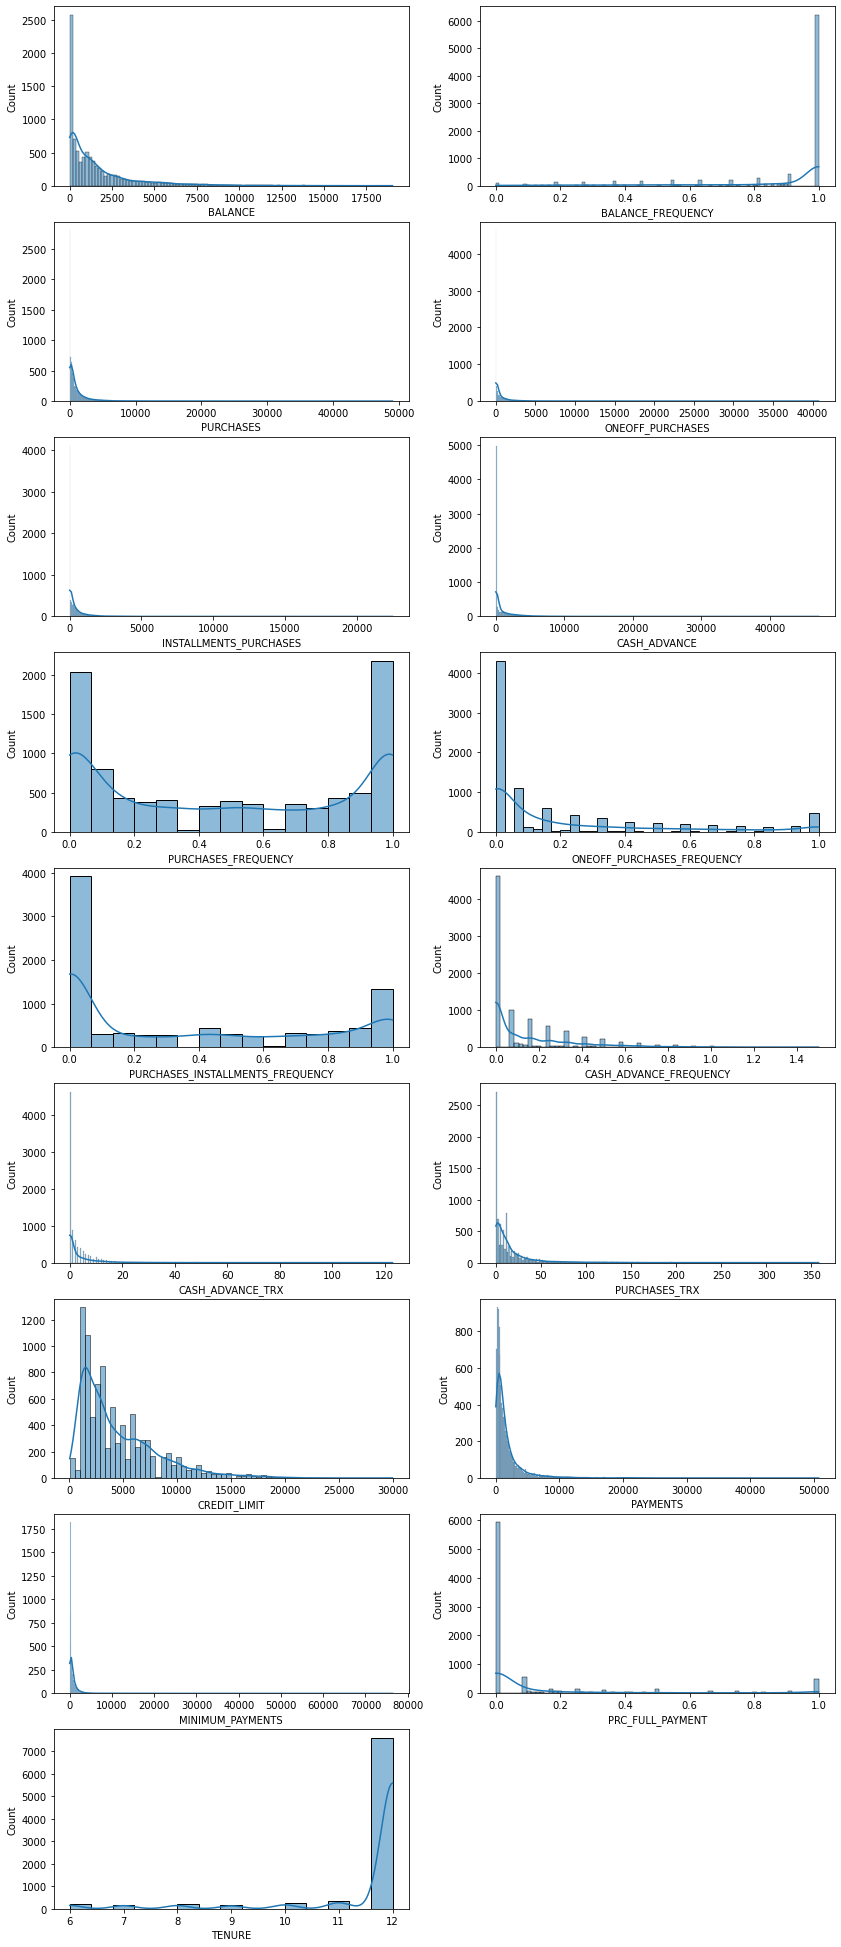

In [21]:
plt.figure(figsize=(14, 35))

def hist(r, c, n, y):
    plt.subplot(r, c, n)
    sns.histplot(x=y, data=ccd, kde=True)

features = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

for i, features in enumerate(features, start=1):
    hist(9, 2, i, features)

plt.show()


    
The histograms above provide insight into the distribution of our data. They illustrate the distribution of values for each feature. At a glance, purchase frequency and tenure demonstrate extreme distributions towards both sides and one side
    



### EDA SUMMARY



Data Distribution: Violin plots, histograms, and box plots were used to examine the distribution of the data. Many features exhibited skewed distributions.

Correlation Analysis: A heatmap was generated to visualize the correlations between different features.



In [22]:
ccd.drop('CUST_ID',axis = 1, inplace = True) # Drop customer ID as no significance in determining a class.
             

# DATA PREPROCESSING

In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [24]:
# Impute the missing data using simple imputer
ccd['MINIMUM_PAYMENTS'] =imp.fit_transform(ccd[['MINIMUM_PAYMENTS']])

ccd['MINIMUM_PAYMENTS'].isnull().sum()

0

In [25]:
# Fill with mean 
ccd['CREDIT_LIMIT'].fillna(value=ccd['CREDIT_LIMIT'].mean(), inplace=True)

ccd['CREDIT_LIMIT'].isnull().sum()

0

In [26]:
# checking the outliers in each column

#for col in ccd.columns:
    
    #fig, ax = plt.subplots(figsize=(7, 3))
    
    #sns.boxplot(x=ccd[col], ax=ax)
   
    #ax.set_title(col, fontsize=15)

    #plt.show()

### MANAGING OUTLIERS

In [27]:
ccd_1= ccd.copy() # Create a copy of the data set

In [28]:
# Features with outliers
outliers_features= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [29]:
# Remove outliers

def remove_outliers(ccd_1,outliers_features):
    # create copy of dataframe
    
    data = ccd_1.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
#         data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [30]:
ccd_1 = remove_outliers(ccd,outliers_features)

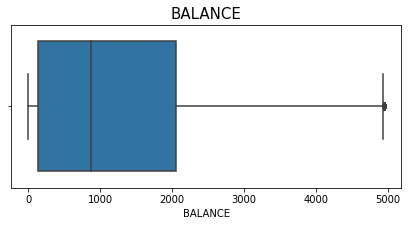

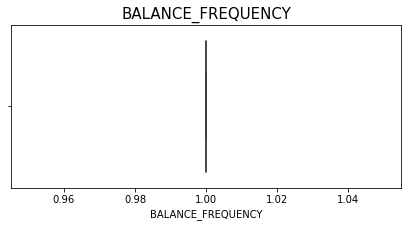

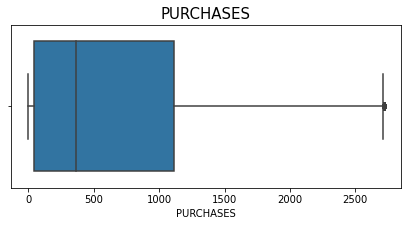

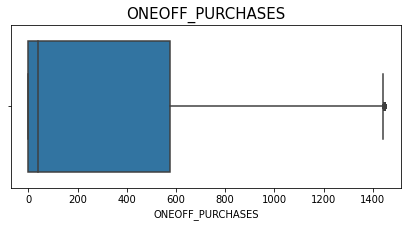

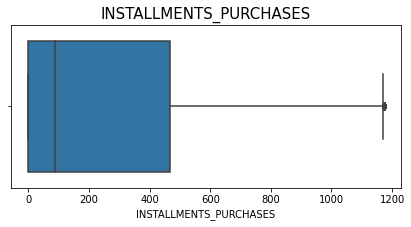

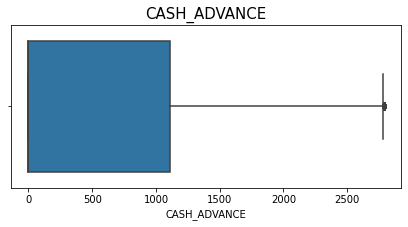

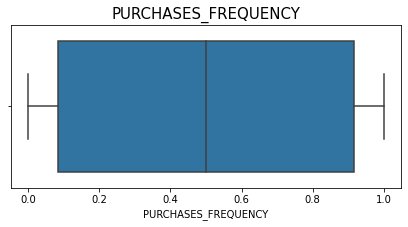

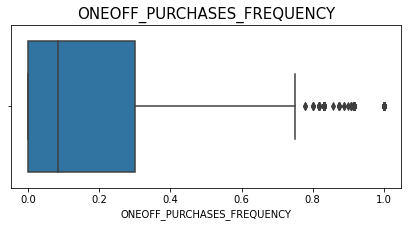

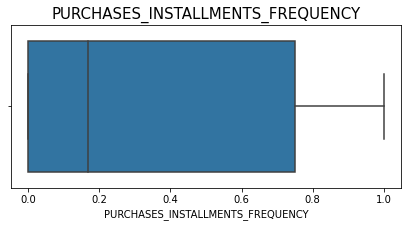

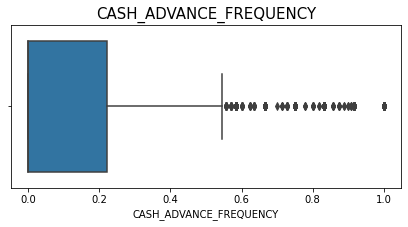

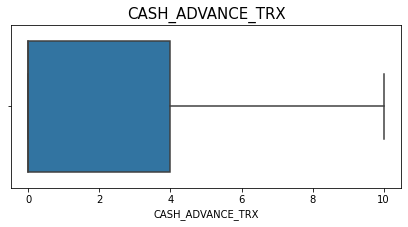

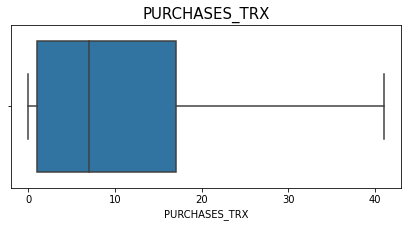

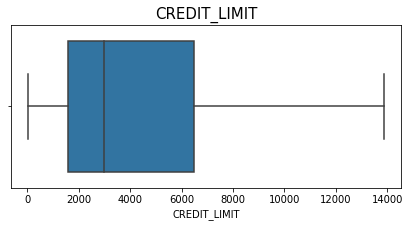

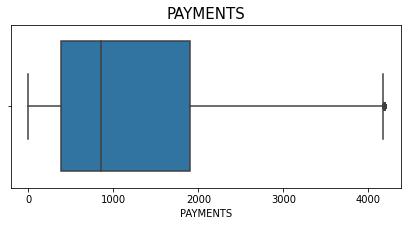

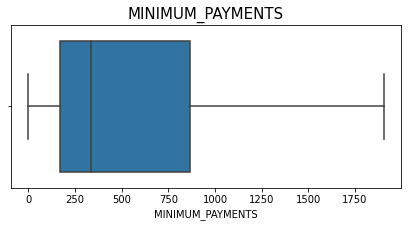

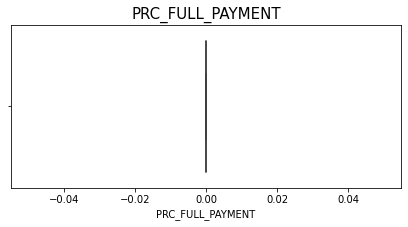

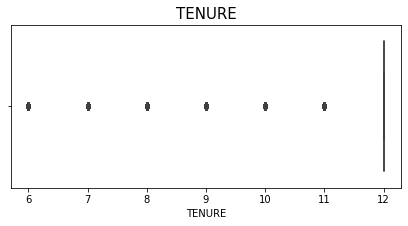

In [31]:
# Checking for outliers after cleaning
for col in ccd_1.columns:
    
    fig, ax = plt.subplots(figsize=(7, 3))
    
    sns.boxplot(x=ccd_1[col], ax=ax)
   
    ax.set_title(col, fontsize=15)

    plt.show()

In [32]:
ccd_1.describe() # Check descriptive statistics

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0,8950.000000
mean,1390.514625,1.0,737.160840,354.413316,295.585568,672.520384,0.490351,0.202458,0.364437,0.134972,2.383128,11.623799,4419.304199,1347.091248,593.691703,0.0,11.517318
std,1537.551539,0.0,879.560687,511.940728,396.268585,998.623835,0.401371,0.298336,0.397448,0.199257,3.417878,13.041645,3383.755481,1272.822027,571.994789,0.0,1.338331
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.0,6.000000
25%,128.281915,1.0,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.0,12.000000
50%,873.385231,1.0,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.0,12.000000
75%,2054.140036,1.0,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.0,12.000000
max,4943.000000,1.0,2716.000000,1444.000000,1172.000000,2785.000000,1.000000,1.000000,1.000000,1.000000,10.000000,41.000000,13850.000000,4178.000000,1904.000000,0.0,12.000000


There are columns with only one value. Let's exclude them.

In [33]:
ccd_1['BALANCE_FREQUENCY'].unique()

array([1.])

In [34]:
ccd_1['PRC_FULL_PAYMENT'].unique()

array([0.])

In [35]:
# drop the columns
ccd_1.drop( columns = ['BALANCE_FREQUENCY'],inplace=True)
ccd_1.drop( columns = ['PRC_FULL_PAYMENT'],inplace=True)

In [36]:
ccd_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   PURCHASES                         8950 non-null   float64
 2   ONEOFF_PURCHASES                  8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8950 non-null   float64
 12  PAYMEN

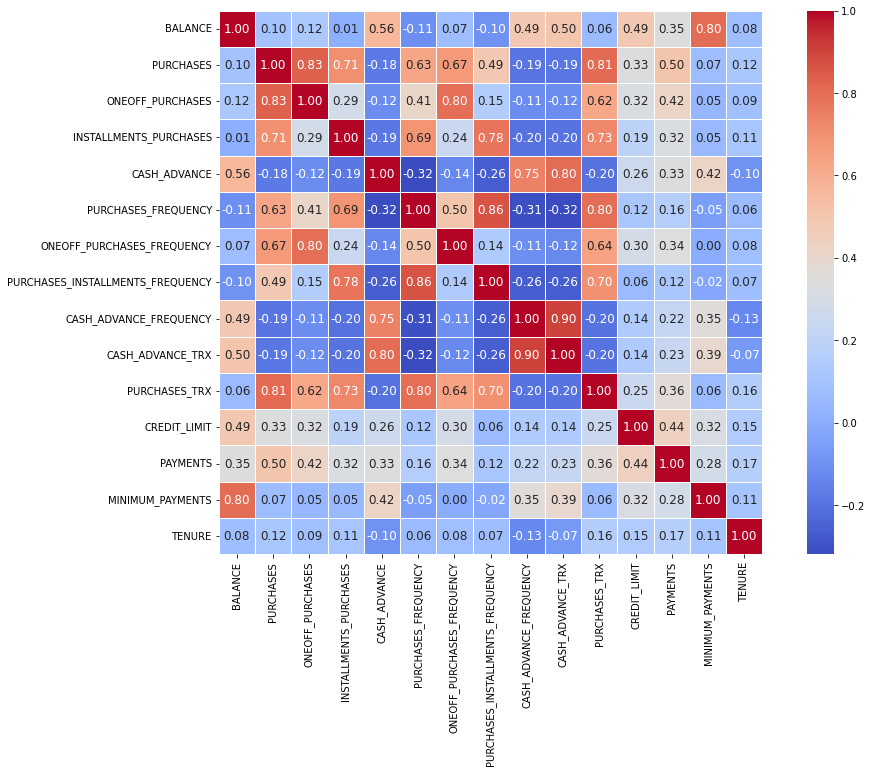

In [37]:
# correction check
# Creating a heatmap of feature correlation
plt.figure(figsize=(16, 10))
hide = np.tril(ccd_1.corr())
sns.heatmap(ccd_1.corr(), cmap="coolwarm", annot=True,
            fmt='.2f', annot_kws={'size':12},
            linewidths=0.5, square=True,)
            #mask= hide)
plt.show()

It is observed that many variables are positively correlated.

### STANDARDIZING

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ccd_1)
scaled_data

array([[-0.87781726, -0.7296787 , -0.69233233, ..., -0.89985334,
        -0.79407593,  0.36067954],
       [ 1.17853222, -0.83814799, -0.69233233, ...,  2.16534226,
         0.83685248,  0.36067954],
       [ 0.71847735,  0.04094223,  0.81802454, ..., -0.56965153,
         0.05873298,  0.36067954],
       ...,
       [-0.88920098, -0.67396595, -0.69233233, ..., -0.99455475,
        -0.89389258, -4.12276757],
       [-0.89566689, -0.83814799, -0.69233233, ..., -1.01712069,
        -0.9405088 , -4.12276757],
       [-0.66200279,  0.4048715 ,  1.4432881 , ..., -1.00878014,
        -0.88362865, -4.12276757]])

In [39]:
print("Mean:\n", np.mean(scaled_data))
print("\n Standard Deviation:\n", np.std(scaled_data))


Mean:
 5.504390653188113e-17

 Standard Deviation:
 1.0


## PRINCIPAL COMPONENT (PCA) ANALYSIS 

In [40]:
# Applying PCA, n_components = 2
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(scaled_data)

print(scaled_data.shape)
print(x_pca.shape)


(8950, 15)
(8950, 2)


In [41]:
x_pca = pd.DataFrame(data =x_pca, columns = ['PC1', 'PC2'])

print('Shape after PCA: ', x_pca.shape)
print('Original shape: ', scaled_data.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))


Shape after PCA:  (8950, 2)
Original shape:  (8950, 15)
Cumulative variance explained by 2 principal components: 59.79%


Here, we use Principal Component Analysis (PCA) to reduce the dimensionality of the data. While some variance may be lost, using PCA aids in creating better visualizations. By applying PCA, the dataset has been transformed to 8950 rows and 2 columns (principal components). Additionally, we observe that using just 2 principal components captures 59.79% of the total variance

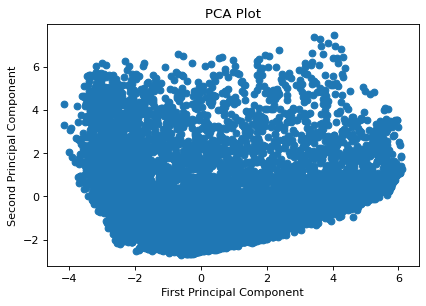

In [42]:
# ploting PCA, with n componenets with 
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_pca.iloc[:, 0], x_pca.iloc[:, 1], cmap ='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')
plt.show()
#plt.colorbar(label='Class')

In [43]:
x_pca # pca data

,PC1,PC2
0,-1.527282,-2.282559
1,-2.228809,2.680802
2,1.397003,0.030136
3,-0.222823,0.111545
4,-1.675806,-1.836524
...,...,...
8945,-0.118116,-2.580684
8946,-0.140738,-2.080350
8947,-0.661654,-2.622552
8948,-2.601867,-2.034090


The plot above shows us the data clustered by the first and second principal components. This plot doesn't provide much useful information at the moment, as there are no unique colors used to signify distinct groups. We will use k-Means next to cluster this data points into groups.

## CLUSTERING MODELS

**Elbow** - method

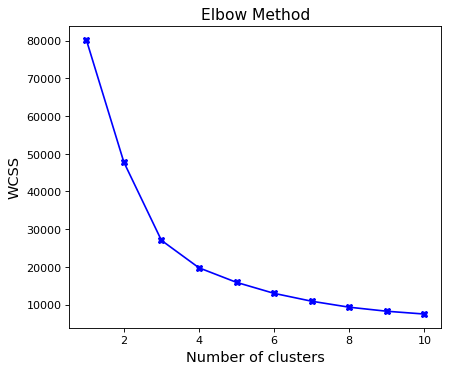

In [44]:
# Applying elbow method to determine optimal n_clusters
cluster_size = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x_pca)
    cluster_size.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=80)
plt.plot(range(1, 11), cluster_size, color='blue',marker = 'X')
plt.title('Elbow Method', fontsize = 14)
plt.xlabel('Number of clusters',fontsize = 13)
plt.ylabel('WCSS',fontsize = 13)
plt.show()

By using the Elbow Method, we are able to determine the optimal number of clusters for the k-Means algorithm. The plot above shows that n_clusters = 3 is the most ideal.

### KMeans - Analysis

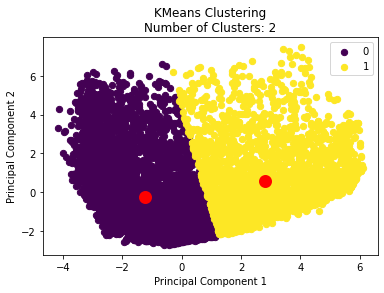

For k = 2, the Silhouette Score is: 0.41


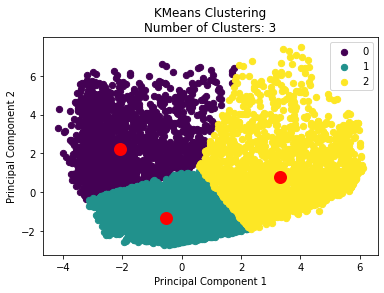

For k = 3, the Silhouette Score is: 0.45


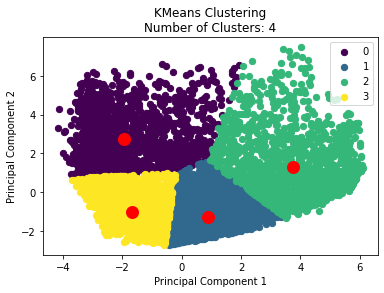

For k = 4, the Silhouette Score is: 0.41


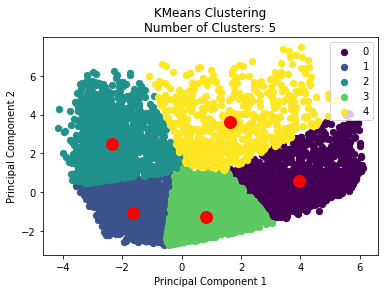

For k = 5, the Silhouette Score is: 0.41


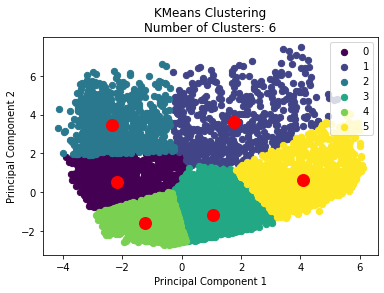

For k = 6, the Silhouette Score is: 0.39


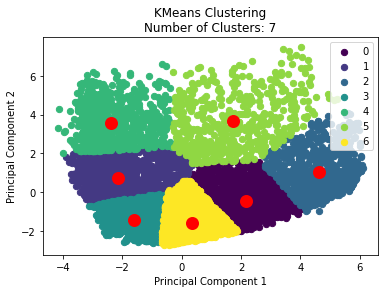

For k = 7, the Silhouette Score is: 0.38


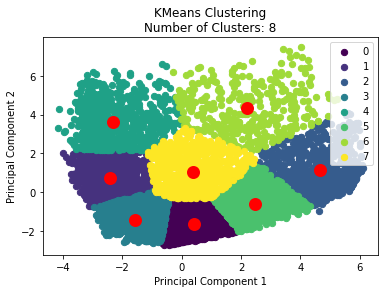

For k = 8, the Silhouette Score is: 0.40


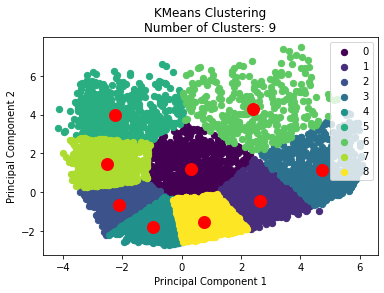

For k = 9, the Silhouette Score is: 0.38


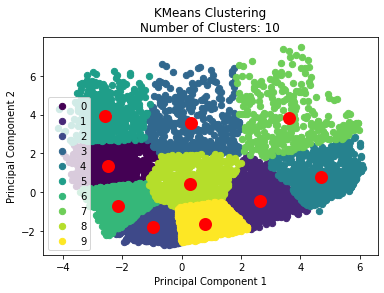

For k = 10, the Silhouette Score is: 0.38


In [45]:
# Create a function for KMeans clustering with k- number of clusters

def kmeans_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=15, max_iter=500, random_state=42)
    clusters = kmeans.fit(x_pca)
    cluster_labels = clusters.labels_
    num_clusters = len(set(cluster_labels))

    # Creating cluster centers
    centroids = kmeans.cluster_centers_

    df1 = pd.DataFrame({'x': x_pca.iloc[:, 0], 'y': x_pca.iloc[:, 1], 'label': cluster_labels})
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, num_clusters))

    fig, ax = plt.subplots(figsize=(6, 4))
    plot_group = df1.groupby('label')
    for label, items in plot_group:
        items.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=[colors[label]], s=40)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=100, linewidths=3, color="red")
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'KMeans Clustering\nNumber of Clusters: {num_clusters}')
    plt.show()
    
    
    ## Print silhouette score
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print(f"For k = {n_clusters:.0f}, the Silhouette Score is: {silhouette_avg:.2f}")
    
# Function call
kmeans_clustering(2)
kmeans_clustering(3)
kmeans_clustering(4)
kmeans_clustering(5)
kmeans_clustering(6)
kmeans_clustering(7)
kmeans_clustering(8)
kmeans_clustering(9)
kmeans_clustering(10)

By using k-Means to cluster the data, the data is grouped into three clusters with the highest silhouette score. Furthermore, each group of data points is clustered around its nearest centroid.

**DBScan** - Analysis

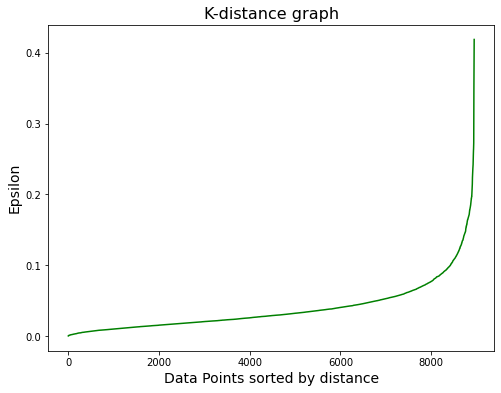

In [46]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_pca.iloc[:, [0, 1]].values)
distances, indices = nbrs.kneighbors(x_pca.iloc[:, [0, 1]].values)

# Plotting K-distance Graph
distances = np.sort(distances[:, 1], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances,color= 'green')
plt.title('K-distance graph', fontsize=16)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

By examining the K-distance graph, we can look for a significant change in the slope of the curve. This point often represents a reasonable epsilon value, indicating the distance threshold for defining clusters. The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is approximately 0.2 in this case.

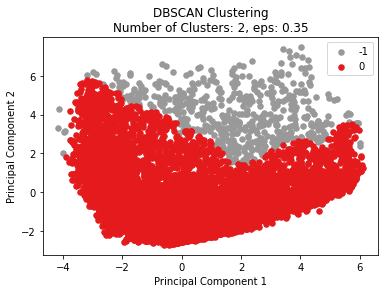

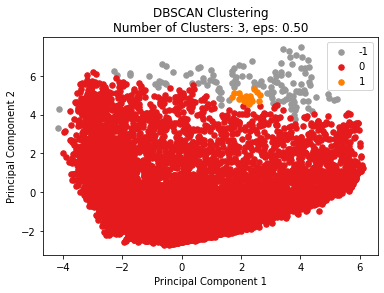

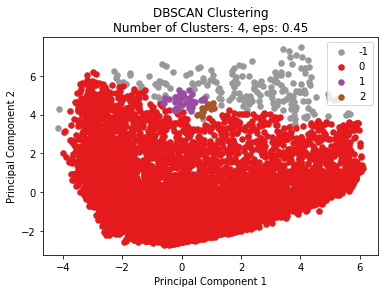

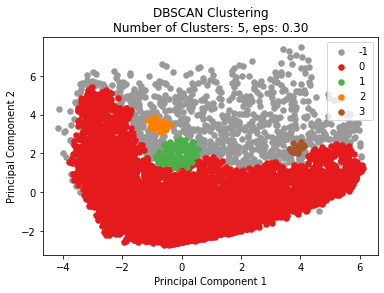

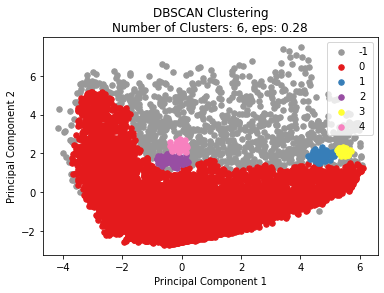

In [47]:
## Assign pca- data points
X = x_pca

## created a function to carry differen eps and min_sample numbers
def dbclusters(eps, min_samples):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    cluster = clustering.labels_
    num_clusters = len(set(cluster)) 
    #- (1 if -1 in cluster else 0) # 
    
    df = pd.DataFrame({'x': X.iloc[:, 0], 'y': X.iloc[:, 1], 'label': cluster}) # Create dataframe with x, y and label
    #print(df)

    cmap = plt.get_cmap('Set1') # Assign color pattern
    colors = cmap(np.linspace(0, 1, num_clusters)) # assogn colors for cluster a range between 0-1

    fig, ax = plt.subplots(figsize=(6, 4))
    plot_group = df.groupby('label')
    for label, items in plot_group:
        items.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=[colors[label]],s=30)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'DBSCAN Clustering\nNumber of Clusters: {num_clusters}, eps: {eps:.2f}')
    plt.show()
    
    #Print silhouette score
    #silhouette_avg = silhouette_score(X, cluster)
    #print(f"For eps = {eps:.2f}, the Silhouette Score is: {silhouette_avg:.2f}")
    #return num_clusters
    
dbclusters(0.35,19)
dbclusters(0.5,19)
dbclusters(0.45,19)
dbclusters(0.3,19)
dbclusters(0.28,19)
#dbclusters(0.24,19)

DBSCAN successfully identified noise points that did not belong to any cluster. These outliers were labeled as -1 in the clustering results and were represented by red dots in the scatter plot.

 
The minimum_samples can be derived from a number of dimensions in the data set (D), as minimum_samples ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. In this analysis, used as 19 (18+1) as min_samples.
    
Based on the Silhouette Score analysis, it was found that the cluster configuration with 3 clusters, excluding the noise points, yielded better performance. Therefore, grouping the data into 3 clusters would be appropriate based on silhouette score evaluation as well.

### Agglomerative Clustering

In [48]:
## Created function with n_clusters with linkage specifications

def ai(n_clusters, linkage):
    agc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agc.fit(x_pca)
    labels = agc.labels_
    num_clusters = len(set(labels))
    
    df1 = pd.DataFrame({'x': x_pca.iloc[:, 0], 'y': x_pca.iloc[:, 1], 'label': labels})
    cmap = plt.get_cmap('rainbow')
    colors = cmap(np.linspace(0, 1, num_clusters))# Assign colors for clusters with range of 0-1

    fig, ax = plt.subplots(figsize=(8, 6))
    plot_group = df1.groupby('label')
    for label, i in plot_group:  #Iterates over the clusters, for each cluster, color, and cluster items are obtained
        ax.scatter(i['x'], i['y'], label=label, color=[colors[label]], s=40)
    
    plt.title('Agglomerative Clustering\nNumber of Clusters: {}, Linkage: {}'.format(n_clusters, linkage))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    
    plt.show()
    
    ## Print  silhouette score
    silhouette_avg = silhouette_score(x_pca, labels)
    print(f"For k = {n_clusters:.0f}, the Silhouette Score is: {silhouette_avg:.2f}")

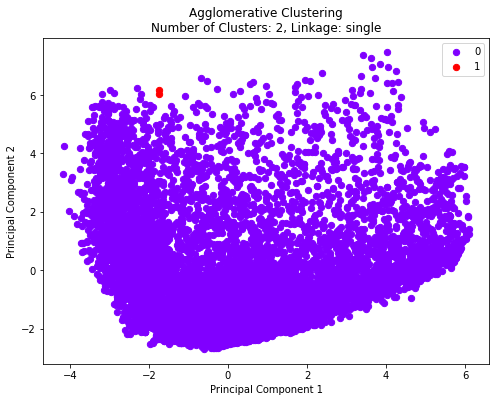

For k = 2, the Silhouette Score is: 0.40


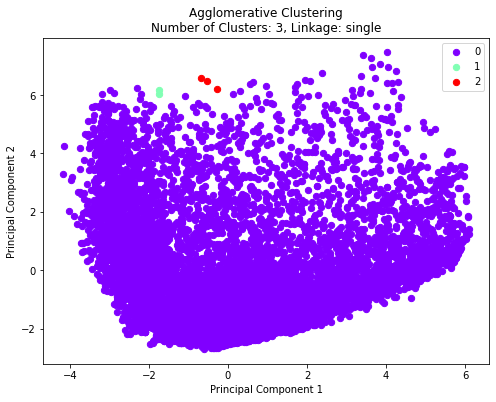

For k = 3, the Silhouette Score is: 0.39


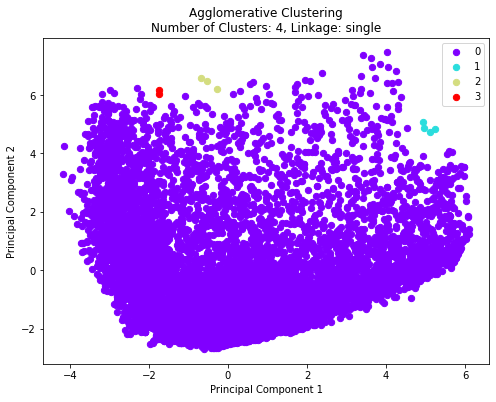

For k = 4, the Silhouette Score is: 0.31


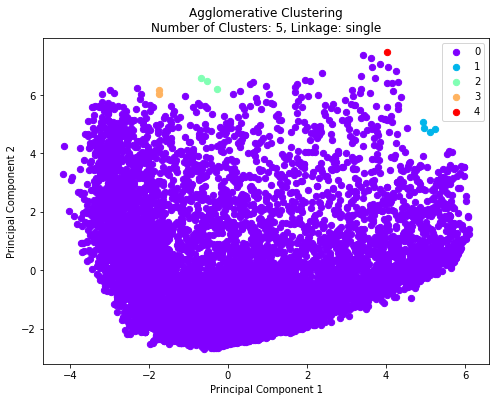

For k = 5, the Silhouette Score is: 0.31


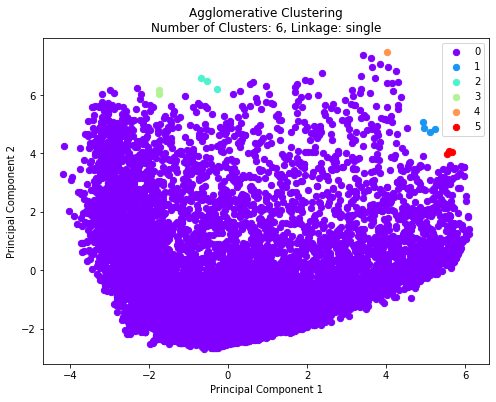

For k = 6, the Silhouette Score is: 0.30


In [49]:
# Call the function for AgglomerativeClustering with linkage as Single
ai(2,'single')
ai(3,'single')
ai(4,'single')
ai(5,'single')
ai(6,'single')


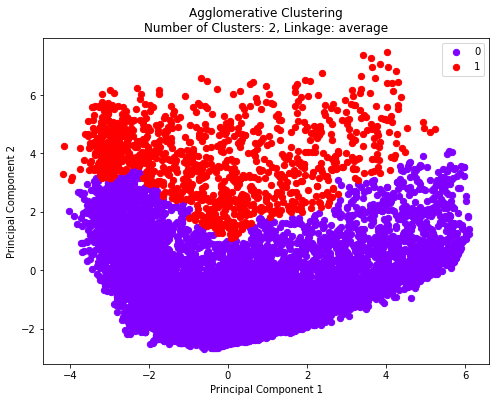

For k = 2, the Silhouette Score is: 0.38


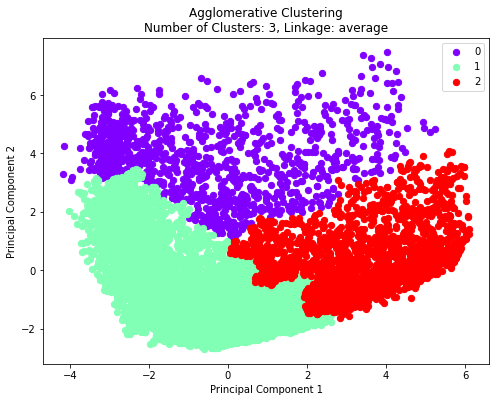

For k = 3, the Silhouette Score is: 0.40


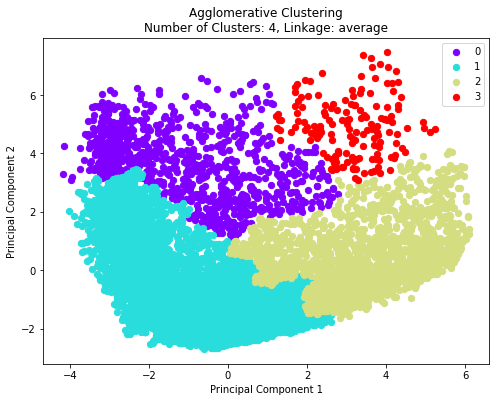

For k = 4, the Silhouette Score is: 0.37


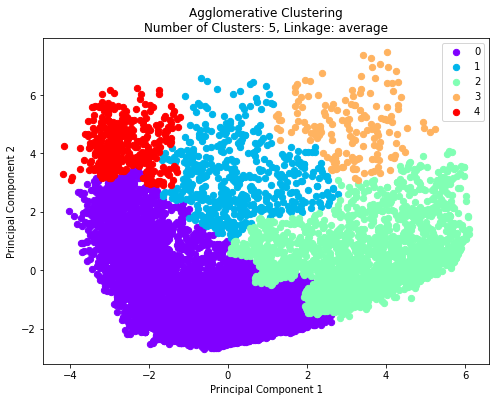

For k = 5, the Silhouette Score is: 0.35


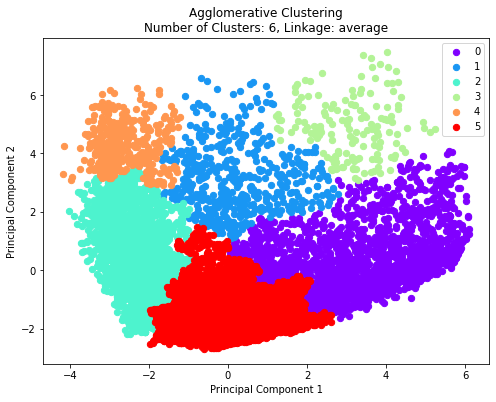

For k = 6, the Silhouette Score is: 0.37


In [50]:
# Call the function for AgglomerativeClustering with linkage as Average
ai(2,'average')
ai(3,'average')
ai(4,'average')
ai(5,'average')
ai(6,'average')


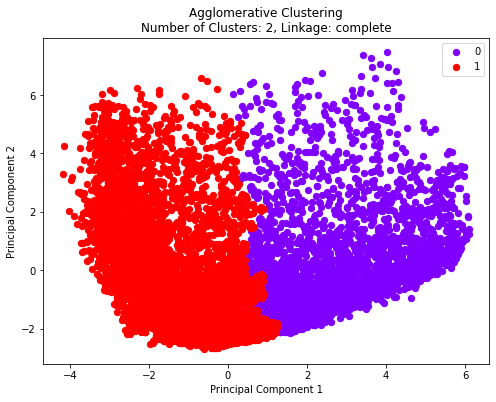

For k = 2, the Silhouette Score is: 0.40


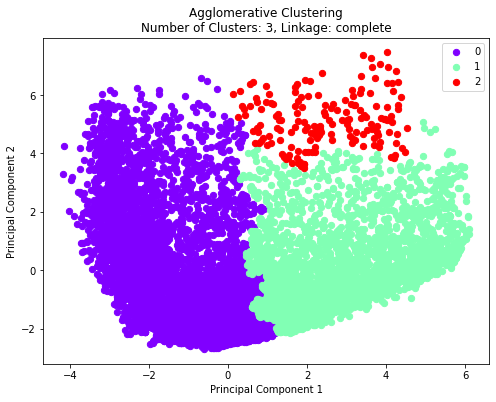

For k = 3, the Silhouette Score is: 0.36


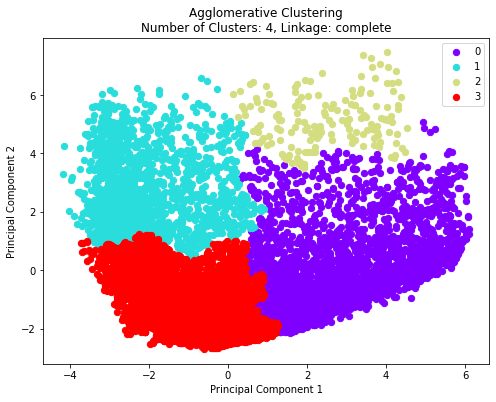

For k = 4, the Silhouette Score is: 0.41


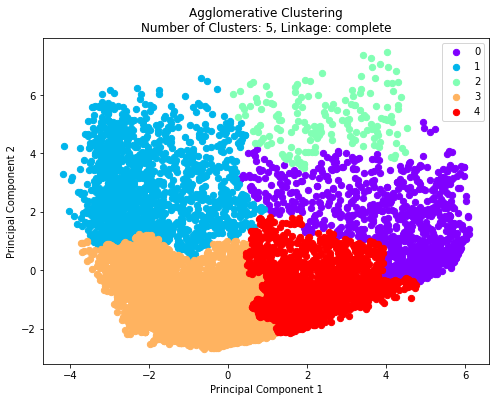

For k = 5, the Silhouette Score is: 0.37


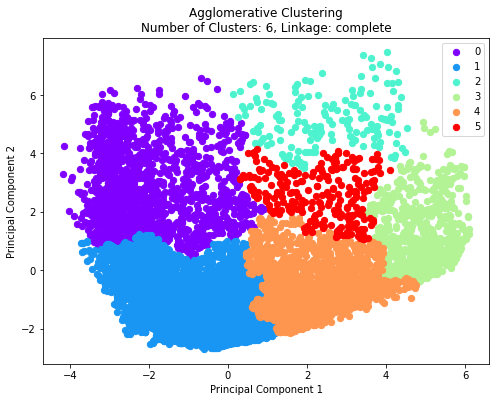

For k = 6, the Silhouette Score is: 0.37


In [51]:
# Call the function for AgglomerativeClustering with linkage as Complete
ai(2,'complete')
ai(3,'complete')
ai(4,'complete')
ai(5,'complete')
ai(6,'complete')


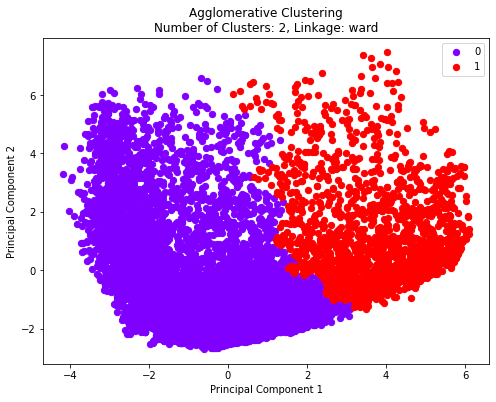

For k = 2, the Silhouette Score is: 0.44


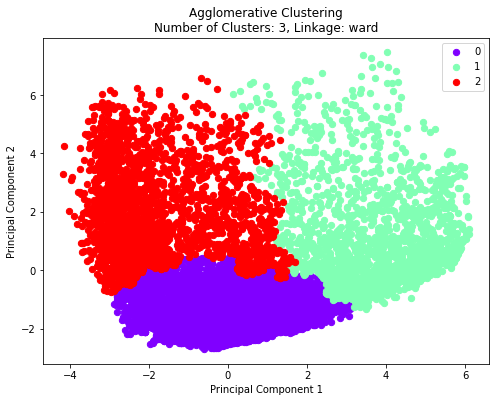

For k = 3, the Silhouette Score is: 0.43


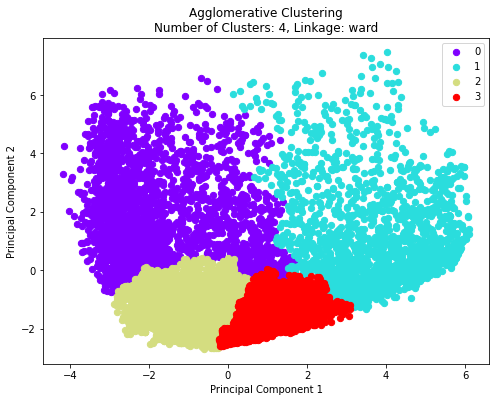

For k = 4, the Silhouette Score is: 0.35


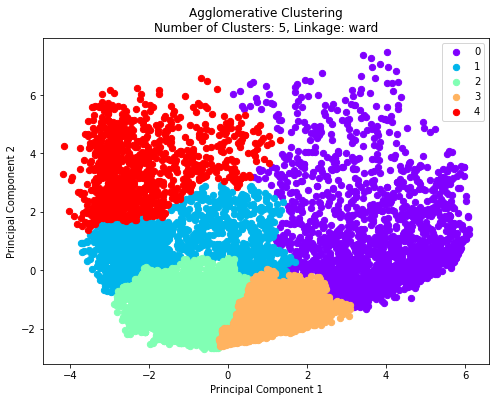

For k = 5, the Silhouette Score is: 0.34


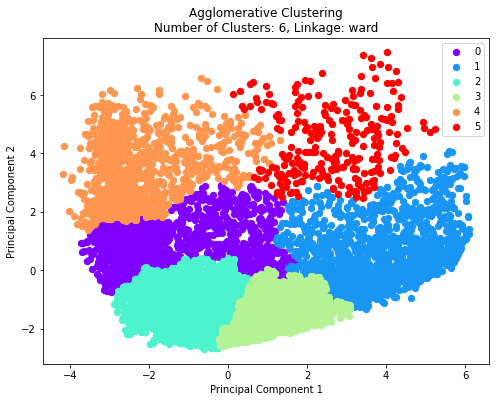

For k = 6, the Silhouette Score is: 0.35


In [52]:
# Call the function for AgglomerativeClustering with linkage as Ward
ai(2,'ward')
ai(3,'ward')
ai(4,'ward')
ai(5,'ward')
ai(6,'ward')


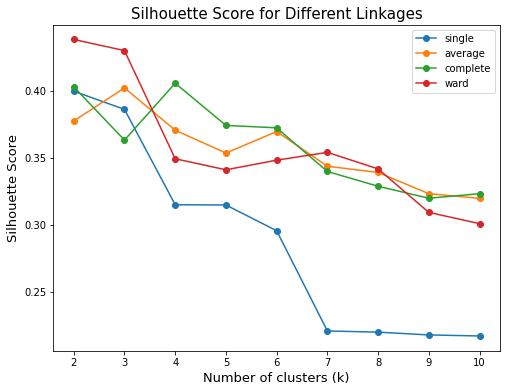

In [53]:
linkages = ['single', 'average', 'complete', 'ward']
silhouette_scores = []

for linkage in linkages:
    scores = []
    for i in range(2, 11):
        agc = AgglomerativeClustering(n_clusters=i, linkage=linkage)
        agc.fit(x_pca)
        scores.append(silhouette_score(x_pca, agc.labels_))
    silhouette_scores.append(scores)

plt.figure(figsize=(8, 6))
for i, linkage in enumerate(linkages):
    plt.plot(range(2, 11), silhouette_scores[i], marker='o', label=linkage)


plt.xlabel('Number of clusters (k)',fontsize = 13)
plt.ylabel('Silhouette Score',fontsize = 13)
plt.title('Silhouette Score for Different Linkages',fontsize = 15)
plt.legend()
plt.show()


Although other linkage options such as single, average, complete and ward were considered, the ward option demonstrated superior performance in accurately separating the clusters, similar to the performance of K-means clustering.
    
The Silhouette Score can be used as a key matrix in determining the number of clusters.

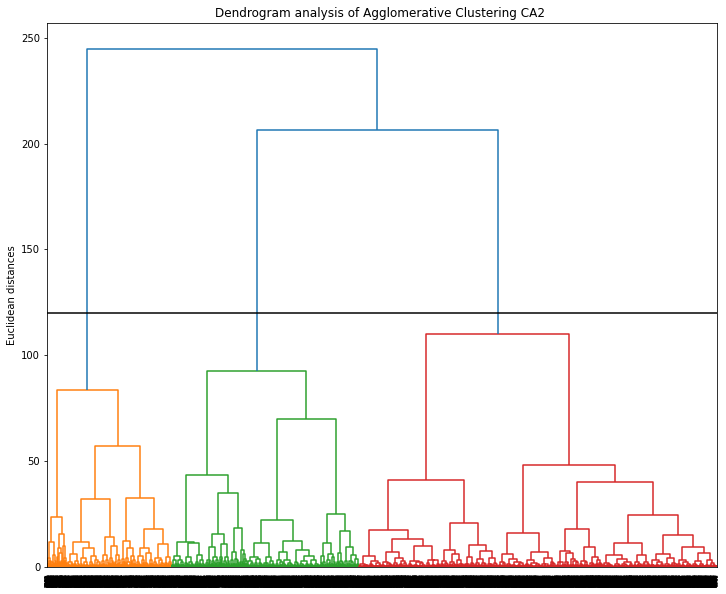

In [54]:
# Agglomerative Clustering
# Creating Dendrogram 

max_d = 120 # threshhold / cut-off value
  
dendrogram = sch.linkage(x_pca, method='ward')
plt.figure(figsize=(12, 10))
plt.title("Dendrogram analysis of Agglomerative Clustering CA2 ")
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(dendrogram)
  
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')

# Displaying the plot
plt.show()

Although we have already concluded that n_clusters = 3 is optimal for k-Means, we can also employ a dendrogram to confirm and visualize this number of clusters. Above, you can see three uniquely colored subgroups (orange, green, and red). These groups are created by three main splits which are based upon their hierarchical distances. Although dendrograms are typically used for agglomerative hierarchical clustering, this visualization is still helpful here, as it further demonstrates the ideal number of clusters.

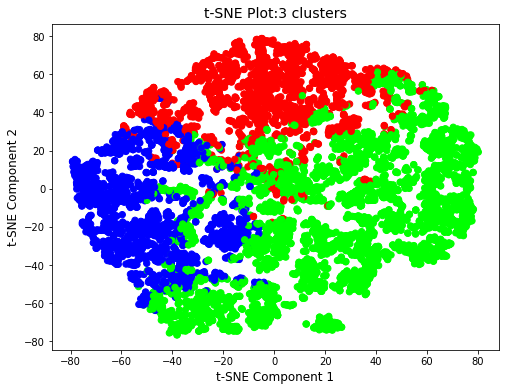

In [55]:
# Apply t-SNE to determine the number of clusters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

kmeans = KMeans(n_clusters= 3,n_init = 10)  # Update the number of clusters by Kmeans 
cluster_labels = kmeans.fit(scaled_data)
clusters = kmeans.fit(scaled_data)
cluster_labels = clusters.labels_


tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(scaled_data)
tsne_data = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Plotting t-SNE Clusters
plt.figure(figsize=(8,6))
plt.scatter(tsne_data.iloc[:,0], tsne_data.iloc[:,1], c=cluster_labels, cmap="brg", s=40)
#plt.scatter(tsne_data.iloc[:,0], tsne_data.iloc[:,1], cmap="brg", s=40)
plt.title('t-SNE Plot:3 clusters',fontsize = 14)
plt.xlabel('t-SNE Component 1',fontsize = 12)
plt.ylabel('t-SNE Component 2',fontsize = 12)
plt.show()

To further explore, the t-SNE (t-distributed Stochastic Neighbor Embedding) visualization was employed. t-SNE is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional space while preserving local structure. By applying t-SNE to the data, we can observe the data points in a two-dimensional scatter plot and gain insights into the natural grouping or clustering tendencies of the data.
    
The plot above shows the data clustered by using t-SNE. Unlike k-Means, which clustered the data into three groups based upon their first and second principal components, determined by the PCA, the t-SNE algorithm has plotted the data by its first and second t-SNE components. Because of this, the k-Means and t-SNE plots appear to have clustered the data differently.
    
It's not uncommon to observe some overlap between clusters when using t-SNE for dimensionality reduction and visualization. t-SNE is a non-linear technique that aims to preserve local structure, which means it may not always perfectly separate clusters, especially when there is inherent overlap or when the data is inherently difficult to cluster.

The overlap between clusters in the t-SNE visualization could indicate instances where data points from different clusters are close to each other in the high-dimensional space and cannot be perfectly separated in the reduced two-dimensional space.

# FINAL MODEL - KMeans

In [56]:
## Finalized  Model- KMenas with 3 clusters
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
kmeans.fit(x_pca)
labels =kmeans.labels_
num_clusters = len(set(labels))

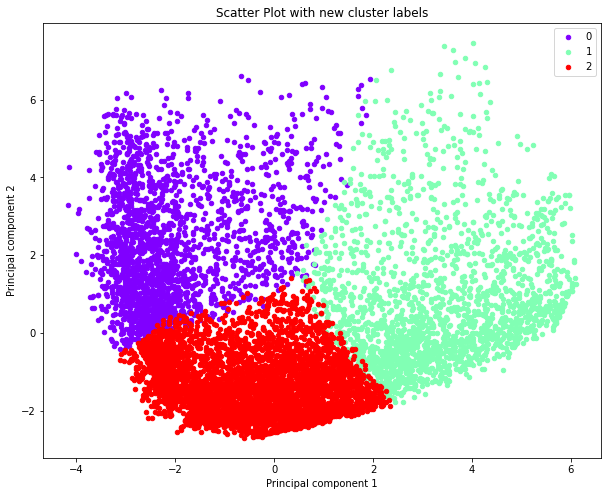

In [57]:
# Visualize the clusters in a scatter plot
df = pd.DataFrame({'x': x_pca.iloc[:, 0], 'y': x_pca.iloc[:, 1], 'label': cluster_labels})
cmap = plt.get_cmap('rainbow') # Assign color pattern
colors = cmap(np.linspace(0, 1, num_clusters)) # Assign colors for clusters in the range between 0-1

fig, ax = plt.subplots(figsize=(10, 8))
for label, items in df.groupby('label'):
    items.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=colors[label][None], s=20)

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatter Plot with new cluster labels')
plt.legend()
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
#clusters = kmeans.fit_predict(x_pca)

#kmeans.cluster_centers_

kmeans.fit(x_pca)
labels=kmeans.labels_

In [59]:
kmeans.inertia_

27024.5870566585

## Predicted Cluster Classes

In [60]:
y_kmeans = kmeans.fit_predict(x_pca)
y_kmeans

array([1, 0, 2, ..., 1, 1, 1])

In [61]:
clusters=pd.concat([ccd, pd.DataFrame({'Cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [63]:
## Print the cluster count
cluster_count = clusters.groupby(['Cluster'])['Cluster'].count()
cluster_count

Cluster
0    2085
1    4793
2    2072
Name: Cluster, dtype: int64

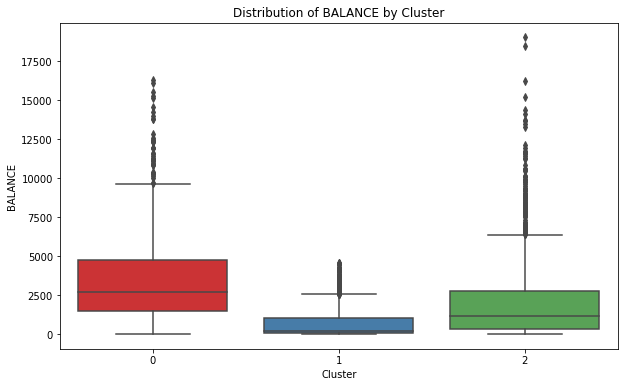

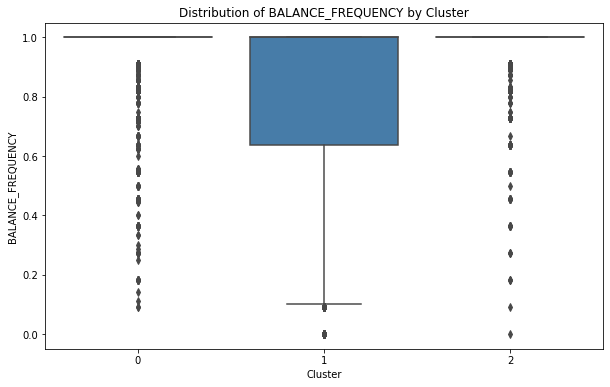

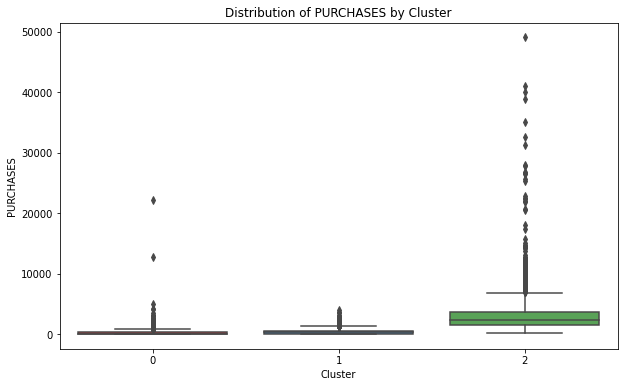

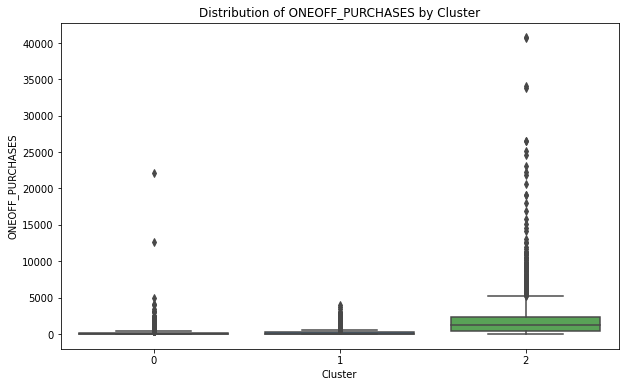

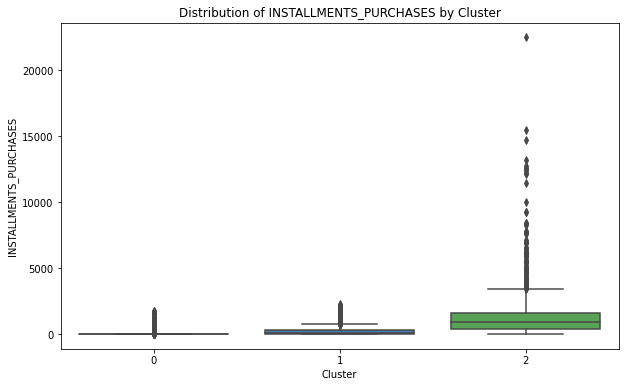

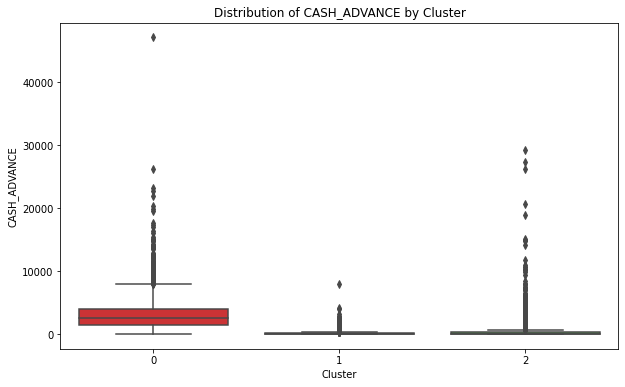

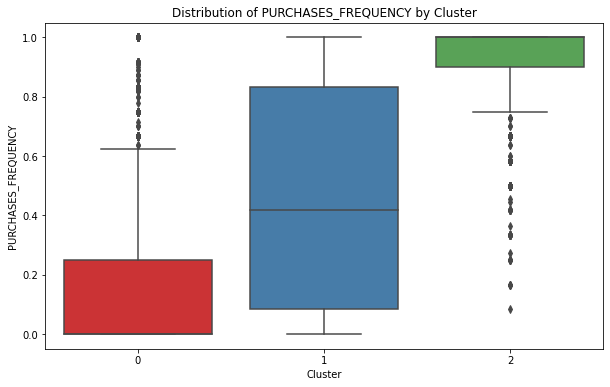

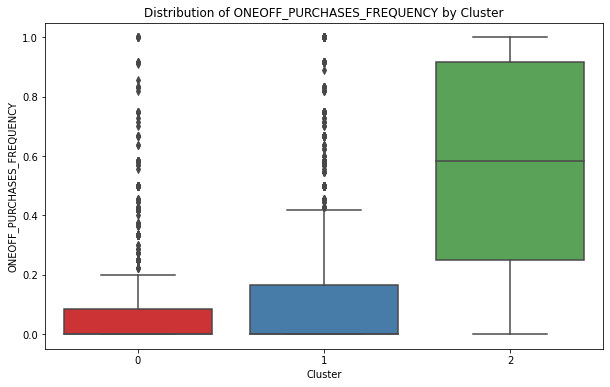

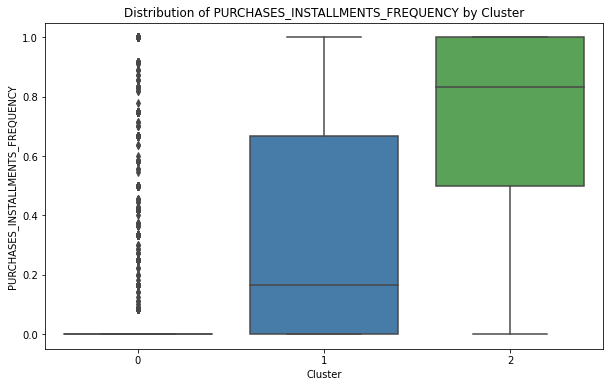

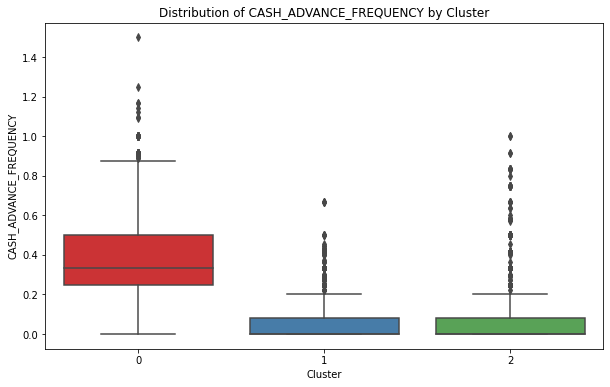

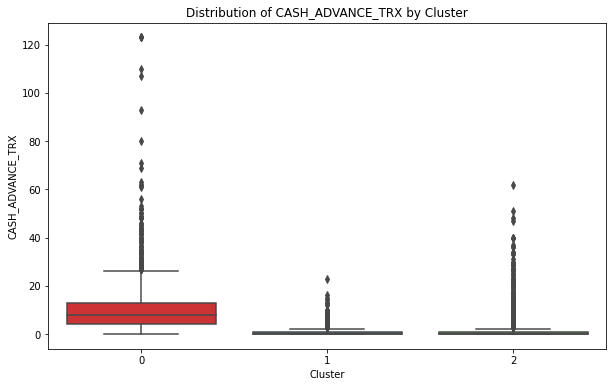

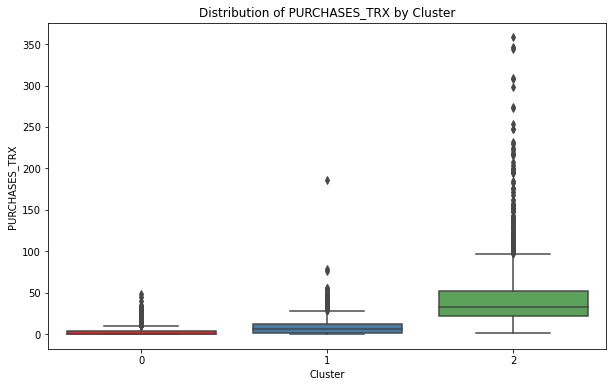

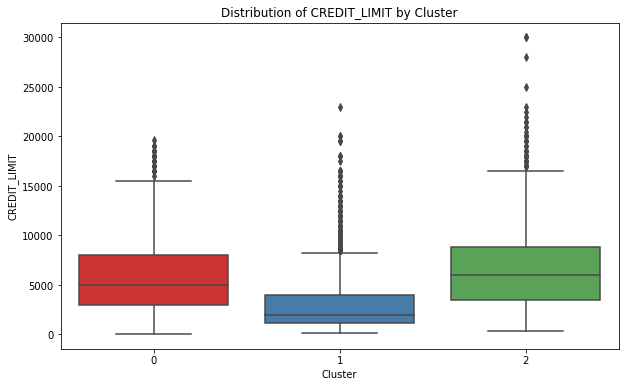

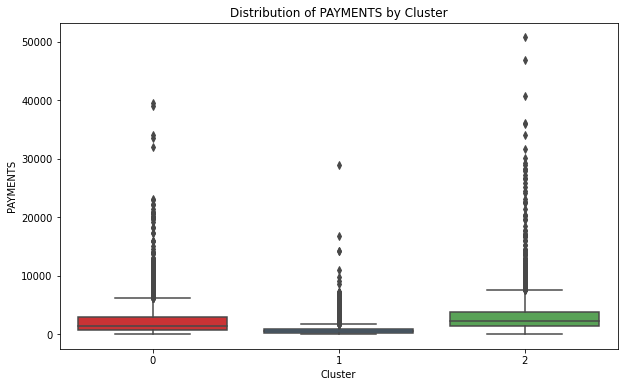

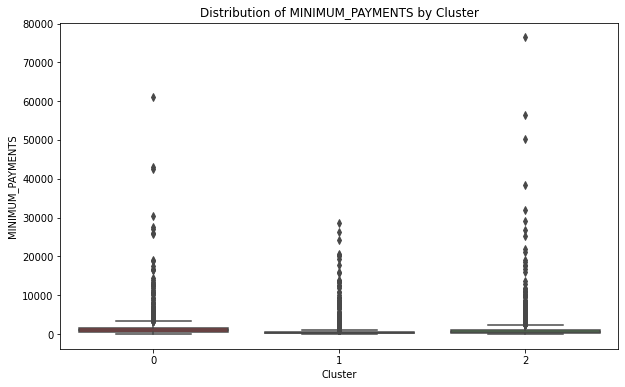

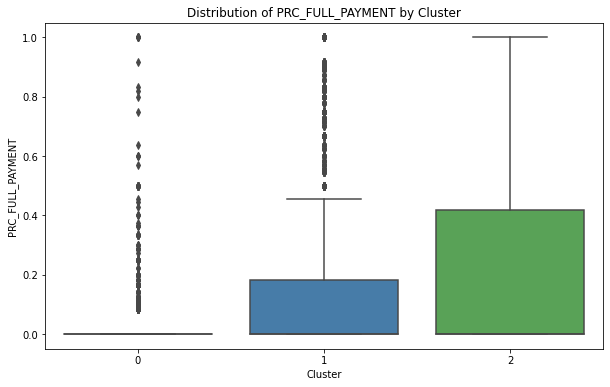

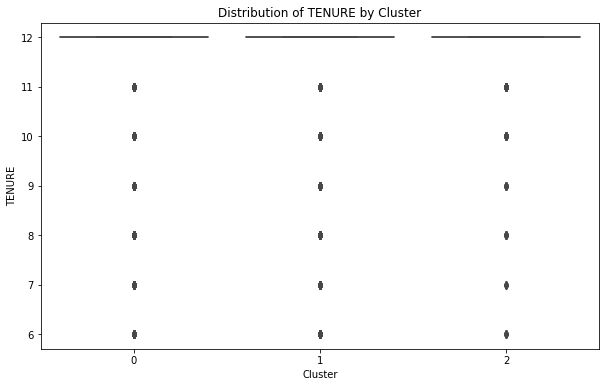

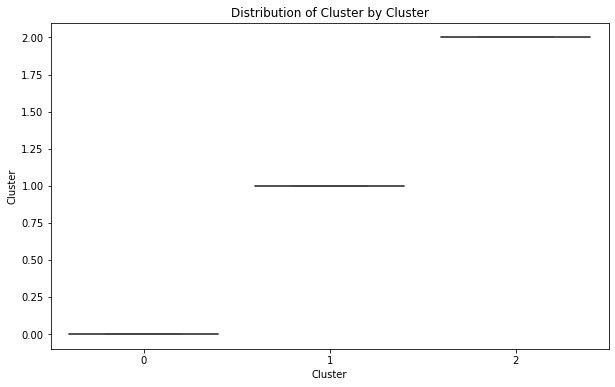

In [64]:
# Box plot visualization
numerical_columns = clusters.select_dtypes(include=['number']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=clusters, palette='Set1')
    plt.title(f'Distribution of {col} by Cluster')
    plt.show()

In [65]:
# Identify significant vaiables, ANOVA method

import scipy.stats as stats

# Dictionary to store p-values
anova_results = {}

for col in numerical_columns:
    if col != 'cluster':  # Skip the cluster column itself
        f_val, p_val = stats.f_oneway(
            clusters[clusters['Cluster'] == 0][col],
            clusters[clusters['Cluster'] == 1][col],
            clusters[clusters['Cluster'] == 2][col]
        )
        anova_results[col] = p_val

# Convert the results to a DataFrame for better readability
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
anova_df = anova_df.sort_values(by='p_value')

# Display the most significant variables (e.g., those with p-value < 0.05)
significant_vars_anova = anova_df[anova_df['p_value'] < 0.05]
significant_vars_anova.head(10)


c:\users\h207171\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,p_value
BALANCE,0.0
CREDIT_LIMIT,0.0
PURCHASES_TRX,0.0
CASH_ADVANCE_TRX,0.0
CASH_ADVANCE_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0
CASH_ADVANCE,0.0
INSTALLMENTS_PURCHASES,0.0
ONEOFF_PURCHASES,0.0


In [66]:
# Identify most significant variable using Feature Importance

from sklearn.ensemble import RandomForestClassifier

X = clusters.drop('Cluster', axis=1)
y = clusters['Cluster']

# Fit Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance.head(10)

,feature,importance
2,PURCHASES,0.186844
5,CASH_ADVANCE,0.141135
11,PURCHASES_TRX,0.119007
10,CASH_ADVANCE_TRX,0.103153
9,CASH_ADVANCE_FREQUENCY,0.080911
0,BALANCE,0.075448
13,PAYMENTS,0.058944
3,ONEOFF_PURCHASES,0.041906
14,MINIMUM_PAYMENTS,0.041822
6,PURCHASES_FREQUENCY,0.037125


In [67]:
# Combining both ANOVA and Feature Importance 

# Filter significant variables from ANOVA
significant_vars_anova = set(anova_df[anova_df['p_value'] < 0.05].index)

# Filter top variables from Random Forest
top_features = set(feature_importance.head(5)['feature'])

# Combine both sets
significant_vars_combined = significant_vars_anova.intersection(top_features)
print(f'Significant variables (combined): {significant_vars_combined}')


Significant variables (combined): {'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PURCHASES', 'CASH_ADVANCE'}


Significant variables (combined): {'CASH_ADVANCE_TRX', 'PURCHASES', 'PURCHASES_TRX', 'CASH_ADVANCE', 'BALANCE'}

In [68]:
# Convert the set to a list
significant_list = list(significant_vars_combined)

# Add the 'cluster' column to the list of significant variables
significant_list.append('Cluster')

# Filter the clusters DataFrame to keep only the significant variables and the cluster column
significant_df = clusters[significant_list]

# Perform the groupby operation
significant_grouped = significant_df.groupby('Cluster').mean()
significant_grouped

,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,PURCHASES,CASH_ADVANCE
Cluster,,,,,
0,10.101199,0.383562,3.324221,248.067962,3149.746080
1,0.837889,0.052236,7.205925,383.862741,199.391959
2,1.930502,0.076953,43.525097,3195.756486,597.485627


In [70]:
# Cluster grouping chart in Bokeh

grouped = pd.DataFrame(significant_grouped)

# Generate bar graph
grouped.plot_bokeh(kind="bar",title="Customer behavior",
                   figsize =(700,600), 
                   xlabel = "Clusters",
                   ylabel="Value")
plt.show()


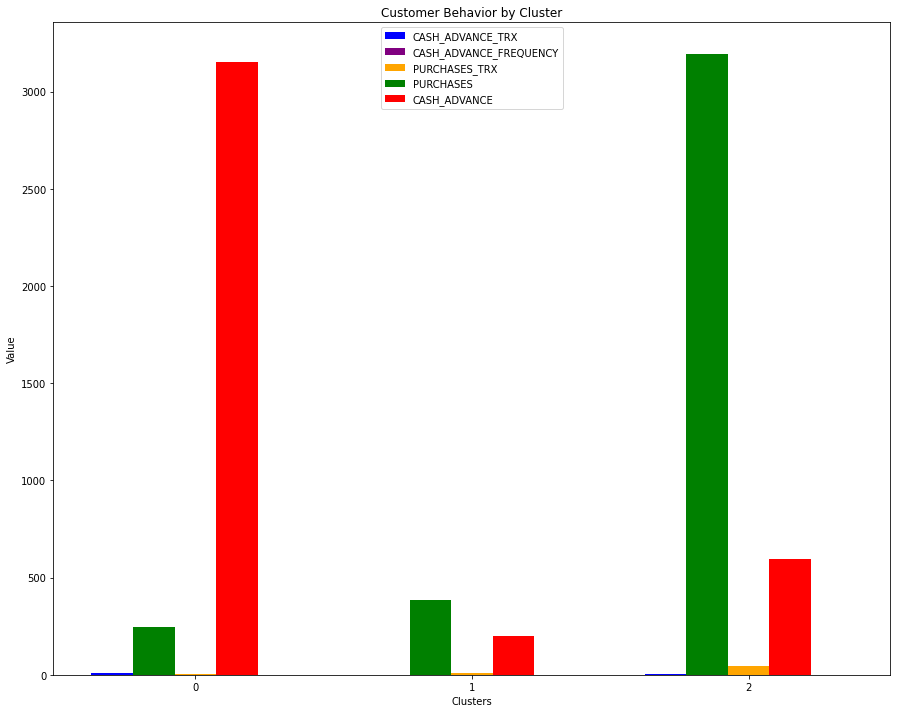

<Figure size 432x288 with 0 Axes>

In [75]:
# plot in matplotlib

grouped = grouped.reset_index(drop=True)

# Plotting with Matplotlib
plt.figure(figsize=(15, 12))

# Plotting each variable as bars for each cluster
bar_width = 0.15
index = grouped.index
cluster_labels = grouped.index.values

plt.bar(index - 2 * bar_width, grouped['CASH_ADVANCE_TRX'], bar_width, label='CASH_ADVANCE_TRX', color='blue')
plt.bar(index + 2 * bar_width, grouped['CASH_ADVANCE_FREQUENCY'], bar_width, label='CASH_ADVANCE_FREQUENCY', color='purple')
plt.bar(index, grouped['PURCHASES_TRX'], bar_width, label='PURCHASES_TRX', color='orange')
plt.bar(index - bar_width, grouped['PURCHASES'], bar_width, label='PURCHASES', color='green')
plt.bar(index + bar_width, grouped['CASH_ADVANCE'], bar_width, label='CASH_ADVANCE', color='red')


# Adding labels and title
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Customer Behavior by Cluster')
plt.xticks(index, cluster_labels)
plt.legend()

plt.show()
plt.tight_layout()

<font size="4">

Summary
</font>

    
<font size="3">


Based on the analysis performed using various clustering techniques such as K-Means,
Agglomerative clustering, and DBSCAN, along with the examination of dendrograms and t-SNE clustervisualizations, we can draw the following conclusions for the credit card customer segmentation:
    
- The analysis identified the presence of three main customer segments within the dataset
using the K-Means clustering algorithm. The behavioral characteristics of each segment are
visually represented.
    
- The Agglomerative Clustering analysis involved different linkage methods to the data, leading
to varying cluster groupings. The ward linkage demonstrated greater appropriateness and
yielded more meaningful segmentation results.
    
- The DBSCAN algorithm encountered challenges in accurately identifying clusters due to the
lack of clear separation between data points, possibly stemming from clusters of varying
densities or overlapping regions.
    
These findings offer valuable insights into the credit card customer segmentation and highlight
the strengths and limitations of the applied clustering techniques. Further exploration and refinement
of the segmentation process can provide financial institutions with valuable information to tailor
targeted marketing strategies and enhance overall customer satisfaction.
    
   
</font>
